In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

/Users/izualkernan/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Implementing backpropagation algorithm 

COE49412 

Imran Zualkernan

Spring 2020

In this notebook we will implement a backpropagation algorithm from scratch.  The purpose is to understand how the Math translates easily into our code. 


In [4]:
import numpy as np

In [1]:
# preliminaries
# concept of a class in Python
# source: https://www.w3schools.com/python/python_classes.asp

class Person:
  def __init__(self, name, age):
    self.name = name
    self.age = age

  def myfunc(self):
    print("Hello my name is " + self.name)

# note that there is no new()
p1 = Person("John", 36)
p1.myfunc()


Hello my name is John


In [114]:
# preliminaries 
# concept of zip
# source: https://www.w3schools.com/python/ref_func_zip.asp

# zip function operates on two list and returns another list of
# pairs from each list. 

a = ("10", "20", "30","hello")
b = ("Jenny", "Christy", "Monica", "Vicky")

x = zip(a, b)
print(x)

# print using iteration.

for i,j in x:
    print(i,j)

10 Jenny
20 Christy
30 Monica
hello Vicky


In [99]:
# preliminaries

# The concept of None
# None means uninitalized

a = [None]
print(a)
a= a*10
print(a)

[None]
[None, None, None, None, None, None, None, None, None, None]


In [115]:
## randn generates an array of shape (d0, d1, ..., dn), 
## filled with random floats sampled from a univariate “normal” 
## (Gaussian) distribution of mean 0 and variance 1

# create a random 1x10 array
a = np.random.randn(10)
print(a)

# creat a random 2 x 3 array 
b = np.random.randn(3,5)
print(b)


[-0.52285838  1.58083976  0.2451904  -0.21308642  0.25781851  0.02110489
 -0.85522108  0.3963813  -0.91046828 -0.198902  ]
[[-0.08480441 -1.48613884  0.17966118 -0.42744942  1.4490254 ]
 [-1.15388411 -0.69271065 -0.91250861 -1.29791821  0.40915756]
 [ 0.16373212  1.97138392 -0.34601334 -1.17940855  0.23306396]]


In [116]:
# Using append to hold arrays in a list
# We can use append to build up a neural network
# layer by layer.

# weights is a list of arrays
weights = []

# create two 2 x 3 arrays and add them to the weights list
weights.append(np.random.randn(2,3))
weights.append(np.random.randn(3,7))

# print weights
weights

[array([[-0.55988242,  1.54806913,  0.48591684],
        [ 0.05058884, -1.55617956,  0.72691948]]),
 array([[-0.3426209 ,  0.16895151,  1.16732847,  0.34590021,  1.59205969,
          0.90587903,  1.11517783],
        [ 0.69075162, -0.37429602, -0.01105215,  0.95360165,  1.13605643,
          0.08898351, -0.34250533],
        [ 0.02278797,  0.45235404,  0.50951145,  0.28988815, -0.78177941,
         -1.48944157,  2.08795471],
        [-1.3638775 , -0.99256073,  1.23744338, -1.05376303,  0.76483575,
          0.80283364,  0.54704587]])]

In [117]:
# Using and returning annoymous functions
# We will use this idea to supply different activation 
# functions.

# Example: Write a function f that returns a function 
# for adding or subtracting 1 from x
# lambda x is like an anonymous function in java 
# originally derived from lambda calculus.

def f(op):
  if(op == '+'):
    return lambda x : x+1
  elif(op == '-'):
    return lambda x : x-1
        
# calling f will return a function called add
add = f('+')
sub = f('-')

# add is a function
print(add)
print(sub)

# now we can call the function normally
print(add(3))
print(sub(3))


<function f.<locals>.<lambda> at 0x108bb34d0>
<function f.<locals>.<lambda> at 0x10a143320>
4
2


In [118]:
# Using reversed to reverse a list
# reversed returns an iterator that 
# goes over the list backwards
# We will use this idea in back propagation.

a = [1,3,5]

# forward
for x in a:
    print(x)

# backwards
for x in (reversed(a)):
    print(x)

1
3
5
5
3
1


In [119]:
# Using enumerate to use the index of a list

x = ["foo", "bar", "coo", "fee", "foo", "fum"]

e = enumerate(x)

# enumerate has pairs like (counter, value)

for counter, value in e:
    print(counter, value)


0 foo
1 bar
2 coo
3 fee
4 foo
5 fum


In [8]:
## Implementing backpropagation
## Source: 
## https://medium.com/@a.mirzaei69/implement-a-neural-network-from-scratch-with-python-numpy-backpropagation-e82b70caa9bb
## comments added to the original code

import numpy as np

class NeuralNetwork(object):
    
    # The constructor takes 
    # 1. layers representing the number of nodes
    # 2. activations representing the activation functions to choose in
    #    each layer. 
    
    def __init__(self, layers = [2 , 10, 1], activations=['sigmoid', 'sigmoid']):
        
        # check to make sure that no. of layers is one more than 
        # no. of activation functions because the input layer 
        # has no activation function.
        
        assert(len(layers) == len(activations)+1)
        
        # define the local variables layers and activations
        self.layers = layers
        self.activations = activations
        
        # initialize weights and biases as two lists to hold
        # weights and biases for each layer
        
        self.weights = []
        self.biases = []
        
        # create random weights for biases and weights
        # for each of the layes.
        
        for i in range(len(layers)-1):
            self.weights.append(np.random.randn(layers[i+1], layers[i]))
            self.biases.append(np.random.randn(layers[i+1], 1))
    
    # do feedforward for x
    # where x is an input
    
    # return a list of a's and z's as expected.
    # a's and z's are layer by layer
    
    def feedforward(self, x):
        # make a copy of x
        a = np.copy(x)
        
        # this variable will contain all the z's
        z_s = []
        
        # this variable will contain all the a's
        # the output of the input layer is simply x which is the
        # input. So we initialize the a_s to contain a. 
        a_s = [a]
        
        # for each layer do
        for i in range(len(self.weights)):
            
            # retrieve the appropriate activation function
            activation_function = self.getActivationFunction(self.activations[i])
            
            # create z_s by z = w.a + b for each layer
            z_s.append(self.weights[i].dot(a) + self.biases[i])
            
            # create z_a by a = f(row) -- 
            # note that we apply it to the last element only 
            # by using the -1 notation. We only want to apply
            # the activation function to the last layer just 
            # added.
            
            a = activation_function(z_s[-1])
            
            # keep track of the new activation or a_s 
            a_s.append(a)
            
            # return both z_s and a_s 
            # we will have z_s and a_s for each layer 
        return (z_s, a_s)

    
    # takes the y -- the actual answer, a's and z's and 
    # calculates the dLoss/dw and dLoss/db
    
    def backpropagation(self,y, z_s, a_s):
        
        # initialize list of dLoss/dw and dLoss/db
        dw = []  # dLoss/dw
        db = []  # dLoss/db
        
        # create an empty list of deltas, one for each weight
        deltas = [None] * len(self.weights)  # delta = dLoss/dz  known as error for each layer
        
        
        # start from the back and insert the last layer error
        # based on the square loss function. Note -1 is used to 
        # fill things from the back of the list 
        # also note that we need to use the derivative function 
        # for the activation function.
        # note that we do not need to use the 2 in the loss function derivation
        
        # again note this is for the last layer only!
        
        deltas[-1] = ((y-a_s[-1])*(self.getDerivitiveActivationFunction(self.activations[-1]))(z_s[-1]))
        
        
        # Perform BackPropagation
        
        # for the rest of the deltas, go in reverse order
        for i in reversed(range(len(deltas)-1)):
            deltas[i] = self.weights[i+1].T.dot(deltas[i+1])*(self.getDerivitiveActivationFunction(self.activations[i])(z_s[i]))        
        
        # now we need to update the weights based on the calculated
        # deltas
        
        #now we will determine the batch size from the first dimension 
        #of shape of y. We simply want to see how many test cases are there
        #for example there may be 10 y's; one for each x. 
        
        batch_size = y.shape[1]
        
        # determine the two derivatives by taking 
        # the average according to batch sizes 
    
        
        db = [d.dot(np.ones((batch_size,1)))/float(batch_size) for d in deltas]
        dw = [d.dot(a_s[i].T)/float(batch_size) for i,d in enumerate(deltas)]
        
        # return the derivitives respect to weight matrix and biases
        return dw, db

    
    # Now we will write the main training function that uses
    # feedforward and backpropagation many times (called epochs)
    # lr (learning rate) is the eta in our equations.
    
    def train(self, x, y, batch_size=10, epochs=100, lr = 0.01):
    
    # update weights and biases based on the output
    # for the number of epochs
    
        for e in range(epochs): 
            i=0
            
            # Do the training in batches
            # each batch is a subset of the original 
            # data 
            
            while(i<len(y)):
                
                # extract a batch
                x_batch = x[i:i+batch_size]
                y_batch = y[i:i+batch_size]
                
                # update i for the next batches
                i = i+batch_size
                
                # do the feedforward for the batch and update the weights
                # based on the average loss for each weight for the whole
                # batch.
                
                z_s, a_s = self.feedforward(x_batch)
                
                # do the back propagation 
                dw, db = self.backpropagation(y_batch, z_s, a_s)
                
                
                # update the weights for each pair of weights and dw
                # and biases and db
                
                self.weights = [w+lr*dweight for w,dweight in  zip(self.weights, dw)]
                self.biases = [w+lr*dbias for w,dbias in  zip(self.biases, db)]
                
                # print the loss using a built in function 
                # to calculate the loss
                
                print("loss = ", np.linalg.norm(a_s[-1]-y_batch) )
    
    
    # This function is being used to return an activation function 
    # depending on its weights
    
    @staticmethod
    def getActivationFunction(name):
        if(name == 'sigmoid'):
            return lambda x : np.exp(x)/(1+np.exp(x))
        elif(name == 'linear'):
            return lambda x : x
        elif(name == 'relu'):
            def relu(x):
                y = np.copy(x)
                y[y<0] = 0
                return y
            return relu
        else:
            print('Unknown activation function. linear is used')
            return lambda x: x
    
    # This function returns the derivative of a function depending
    # on its name.
    
    @staticmethod
    def getDerivitiveActivationFunction(name):
        if(name == 'sigmoid'):
            sig = lambda x : np.exp(x)/(1+np.exp(x))
            return lambda x :sig(x)*(1-sig(x)) 
        elif(name == 'linear'):
            return lambda x: 1
        elif(name == 'relu'):
            def relu_diff(x):
                y = np.copy(x)
                y[y>=0] = 1
                y[y<0] = 0
                return y
            return relu_diff
        else:
            print('Unknown activation function. linear is used')
            return lambda x: 1

In [121]:
# Let us see what the constructor does.
# for a simple 3 layer network

import matplotlib.pyplot as plt
    
nn = NeuralNetwork([2, 3, 1],activations=['sigmoid', 'sigmoid'])

print(nn.layers)
print(nn.activations)

print(nn.weights)
print(nn.biases)

[2, 3, 1]
['sigmoid', 'sigmoid']
[array([[-1.11092136, -1.22907365],
       [-0.95507278,  0.0576407 ],
       [ 0.49999654, -1.91488116]]), array([[ 2.11913924,  1.74288539, -0.49865427]])]
[array([[-0.01969041],
       [ 0.14240766],
       [ 0.02741788]]), array([[0.53355539]])]


In [33]:
# Let us see what the constructor does.

import matplotlib.pyplot as plt
nn = NeuralNetwork([1, 2,3,1],activations=['sigmoid', 'sigmoid','sigmoid'])


print(nn.layers)
print(nn.activations)

# should see the arrays as 
# 1 x 2
# 2 x 3
# 3 x 1 

# but this implementation does it backwards
# as long as we are consistent the math is 
# the same.

# 2 x 1
# 3 x 2 
# 1 x 3

print(nn.weights)
print(nn.biases)

[1, 2, 3, 1]
['sigmoid', 'sigmoid', 'sigmoid']
[array([[0.61486887],
       [0.11471677]]), array([[ 2.14108144, -0.98368127],
       [ 0.21920002, -1.4756294 ],
       [-0.04453245,  0.42606575]]), array([[ 0.35117885, -0.47966615, -0.36995642]])]
[array([[ 0.98017579],
       [-0.3117457 ]]), array([[ 0.81209901],
       [-0.32702442],
       [-0.46760101]]), array([[-0.34314965]])]


In [162]:
# Let us try feedforward on one simple output

import matplotlib.pyplot as plt
    
nn = NeuralNetwork([2, 3, 1],activations=['sigmoid', 'sigmoid'])

x = [[2],[3]] # 2 x 1 
## Let us do one feedforward
## Remember input is 1 row
a, a = nn.feedforward(x)

print("weights=", nn.weights)  ## 3 x 2

print("z_s=",z)
print("a_s=",a)

weights= [array([[ 0.23708622, -0.89761943],
       [ 0.50739804,  2.07836043],
       [-1.08372785,  1.72855885]]), array([[-0.77785863, -1.21570196,  0.02441235]])]
z_s= [array([[-1.55671869],
       [ 2.23491266],
       [ 0.09842918]]), array([[-0.09926471]])]
a_s= [array([[2],
       [3]]), array([[0.02682335],
       [0.99902325],
       [0.88745298]]), array([[0.37528392]])]


In [9]:
# Let us try feedforward on one simple output

import matplotlib.pyplot as plt
    
nn = NeuralNetwork([2, 3, 1],activations=['sigmoid', 'sigmoid'])

# note that x is a 2 x 4 matrix which means we have four 
# data points. Each column represents a data point

X = np.random.rand(2,4)

# note that y is 1 x 4 matrix where each element (column) is the 
# output for the correponding data point

y = np.array([[1,2,3,4]])

print(X.shape)
print(y.shape)

z, a = nn.feedforward(X)

# print a and z
print("a=",a)
print("z=",z)

for i in z:
    print("z",i.shape)
    
for i in a: 
    print("a",i.shape)

dw, db = nn.backpropagation(y, z,a)

print("dw=",dw)
print("db=",db)

(2, 4)
(1, 4)
a= [array([[0.51407879, 0.52351973, 0.39458503, 0.53413611],
       [0.63517536, 0.44564836, 0.66887408, 0.15559223]]), array([[0.65620179, 0.65107037, 0.64649248, 0.64279984],
       [0.65810307, 0.5844534 , 0.68794488, 0.46592308],
       [0.27775991, 0.2625793 , 0.3255199 , 0.24167572]]), array([[0.66862352, 0.61709145, 0.6921017 , 0.52901943]])]
z= [array([[ 0.64641347,  0.62374747,  0.60365681,  0.58753707],
       [ 0.65485225,  0.34108231,  0.79052889, -0.1365193 ],
       [-0.95560051, -1.03260542, -0.72851857, -1.14351429]]), array([[0.70196602, 0.47722105, 0.8099634 , 0.11620833]])]
z (3, 4)
z (1, 4)
a (2, 4)
a (3, 4)
a (1, 4)
dw= [array([[-0.03747772, -0.02836124],
       [ 0.15832858,  0.11489893],
       [ 0.00807241,  0.00646125]]), array([[0.28369605, 0.2451438 , 0.11882376]])]
db= [array([[-0.07612673],
       [ 0.31923822],
       [ 0.01655592]]), array([[0.43920422]])]


In [10]:
# Let us try feedforward on more complex output

import matplotlib.pyplot as plt

# the NN has two inputs and two output neurons. So x is <x1, x2> and 
# y is <y1, y2>

nn = NeuralNetwork([2, 3, 2],activations=['sigmoid', 'sigmoid'])

# note that x is a 2 x 4 matrix which means we have four 
# data points. Each column represents a data point

X = np.random.rand(2,4)

# note that y is 2 x 4 matrix where each column is the 
# output for the correponding data point

y = np.array([[1,2,3,4], [5,6,7,8]])

print(X.shape)
print(y.shape)

z, a = nn.feedforward(X)

# print a and z
print("a=",a)
print("z=",z)

for i in z:
    print("z",i.shape)
    
for i in a: 
    print("a",i.shape)

dw, db = nn.backpropagation(y, z,a)

print("dw=",dw)
print("db=",db)

(2, 4)
(2, 4)
a= [array([[0.91629691, 0.06980572, 0.89830184, 0.40632016],
       [0.96121621, 0.24113957, 0.26759889, 0.81885333]]), array([[0.26141919, 0.36607213, 0.3374579 , 0.28995226],
       [0.10979779, 0.15260962, 0.13437052, 0.12345547],
       [0.04139104, 0.29545233, 0.21250782, 0.073139  ]]), array([[0.48561028, 0.40843547, 0.43269112, 0.4664271 ],
       [0.29543567, 0.32284437, 0.31149563, 0.29691556]])]
z= [array([[-1.03860529, -0.54910477, -0.67464334, -0.89561594],
       [-2.09280826, -1.71427835, -1.86285592, -1.96010698],
       [-3.14241868, -0.8690485 , -1.30987468, -2.53944186]]), array([[-0.0575748 , -0.37043686, -0.2708798 , -0.13449398],
       [-0.86912855, -0.74073075, -0.79313636, -0.86202922]])]
z (3, 4)
z (2, 4)
a (2, 4)
a (3, 4)
a (2, 4)
dw= [array([[-0.2656305 , -0.26434214],
       [ 0.03480847,  0.03359383],
       [ 0.05266027,  0.04274685]]), array([[0.16050343, 0.06651036, 0.07929364],
       [0.41516778, 0.1720505 , 0.20741747]])]
db= [array([[-0

(1, 1000)
(1, 1000)
loss =  22.32041619921443
loss =  22.320042667045914
loss =  22.31966733605442
loss =  22.31929020084415
loss =  22.318911256066304
loss =  22.318530496419648
loss =  22.31814791665111
loss =  22.31776351155632
loss =  22.317377275980096
loss =  22.316989204816995
loss =  22.316599293011706
loss =  22.31620753555953
loss =  22.315813927506774
loss =  22.315418463951094
loss =  22.315021140041864
loss =  22.314621950980456
loss =  22.314220892020504
loss =  22.313817958468146
loss =  22.31341314568219
loss =  22.31300644907428
loss =  22.312597864108994
loss =  22.312187386303897
loss =  22.311775011229578
loss =  22.3113607345096
loss =  22.31094455182044
loss =  22.310526458891356
loss =  22.31010645150421
loss =  22.309684525493246
loss =  22.309260676744792
loss =  22.308834901196942
loss =  22.30840719483916
loss =  22.307977553711808
loss =  22.307545973905665
loss =  22.30711245156132
loss =  22.306676982868556
loss =  22.306239564065653
loss =  22.30580019143

loss =  19.507980435763283
loss =  19.496421304052976
loss =  19.48497571711572
loss =  19.473642620371045
loss =  19.46242096394407
loss =  19.45130970050527
loss =  19.44030778388671
loss =  19.429414168259303
loss =  19.41862780771359
loss =  19.40794765612893
loss =  19.397372667246746
loss =  19.386901794886263
loss =  19.37653399325761
loss =  19.366268217339357
loss =  19.356103423296325
loss =  19.346038568920203
loss =  19.336072614080063
loss =  19.3262045211736
loss =  19.316433255572377
loss =  19.306757786056327
loss =  19.297177085234214
loss =  19.28769012994775
loss =  19.278295901657863
loss =  19.26899338681223
loss =  19.259781577193564
loss =  19.25065947024852
loss =  19.24162606939726
loss =  19.232680384323906
loss =  19.22382143124837
loss =  19.215048233179846
loss =  19.206359820152652
loss =  19.197755229444923
loss =  19.189233505780766
loss =  19.180793701516507
loss =  19.172434876811653
loss =  19.164156099785213
loss =  19.155956446657985
loss =  19.1478

loss =  18.111314173690772
loss =  18.110431193383793
loss =  18.109551293825827
loss =  18.108674458837903
loss =  18.107800672355754
loss =  18.10692991842879
loss =  18.106062181219098
loss =  18.10519744500044
loss =  18.104335694157257
loss =  18.10347691318371
loss =  18.102621086682696
loss =  18.101768199364898
loss =  18.10091823604784
loss =  18.10007118165494
loss =  18.099227021214592
loss =  18.098385739859253
loss =  18.097547322824525
loss =  18.096711755448254
loss =  18.095879023169662
loss =  18.095049111528432
loss =  18.09422200616387
loss =  18.09339769281404
loss =  18.092576157314877
loss =  18.09175738559939
loss =  18.090941363696796
loss =  18.09012807773171
loss =  18.0893175139233
loss =  18.088509658584524
loss =  18.087704498121276
loss =  18.086902019031637
loss =  18.086102207905054
loss =  18.08530505142159
loss =  18.08451053635114
loss =  18.083718649552676
loss =  18.08292937797349
loss =  18.082142708648444
loss =  18.08135862869925
loss =  18.08057

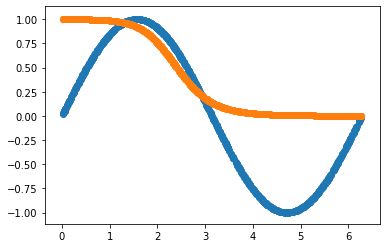

In [11]:
# Let us train the neural network to learn y = sin(x)

nn = NeuralNetwork([1, 100, 1],activations=['sigmoid', 'sigmoid'])

# generate a sequence of randon values of x and y=sin(x)
# as the training set. Generate 10000 input/output pairs
# We need to reshape to get the matrix in a linear form
# because there is one x = [x1, x2, .......  x1000]

X = 2*np.pi*np.random.rand(1000).reshape(1, -1)

# y is simply the sine of x and y = [sin(x1), sin(x2), ..... sin(x1000)]
y = np.sin(X)

print(X.shape)
print(y.shape)

# train for 1000 epochs
nn.train(X, y, epochs=1000, batch_size=64, lr = .1)

# calculate the prediction sin(x) for the input X
# we only need the a's because this is the output
# we do not need the z's so we use that as _

_, a_s = nn.feedforward(X)

# Let us see how well the nn worked
# Plot y and predicted value to see if they 
# match.
plt.scatter(X.flatten(), y.flatten())
plt.scatter(X.flatten(), a_s[-1].flatten())
plt.show()